# Jupyter Notebook for K-Means for Home work 2
Cluster data points using K-Means

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_data(filename):
    data = pd.read_csv(filename)
    data = data.to_numpy()
    # plot data
    for pt in data:
        plt.scatter(pt[0], pt[1])
    plt.title('Raw data for K-Means')
    return data

In [3]:
def distance(x, y):
    return np.linalg.norm(x-y)

In [4]:
def kmeans(k, data, epsilon=0):
    datapoints, features = data.shape
    np.random.shuffle(data)
    # randomly selected k centroids
    centroids = np.array([data[i] for i in np.random.choice(datapoints, k, replace=False)])
    
    # centroids at every iteration
    old_centroids = np.zeros(centroids.shape)
    belongs_to = np.zeros(datapoints)
    norm = distance(centroids, old_centroids)
    iteration = 0
    while norm > epsilon:
        iteration += 1
        norm = distance(centroids, old_centroids)
        # for each datapoint in the dataset
        for index1,datapoint in enumerate(data):
            # distance vector of size k
            distance_vector = np.zeros(k)
            # for each centroid
            for index2,center in enumerate(centroids):
                distance_vector[index2] = distance(center, datapoint)
            # assign closest centroid to a datapoint
            belongs_to[index1] = np.argmin(distance_vector)
        
        tmp_centroids = np.empty([k, features])
        
        # for each cluster
        for index in range(k):
            neighbours = [cursor for cursor in range(len(belongs_to)) if belongs_to[cursor] == index]
            # calculate mean of all the points
            tmp_centroids[index, :] = np.mean(data[neighbours], axis=0)
            
        old_centroids = centroids
        centroids = tmp_centroids
    
    return centroids, belongs_to

In [5]:
def plot(data, centroids, belongs_to):
    colors = ['r', 'g', 'b', 'g', 'o', 'y', 'm', 'c', 'k']
    
    # for each datapoint
    for index in range(len(data)):
        plt.scatter(data[index][0], data[index][1], c=colors[belongs_to[index]])
    for pt in centroids:
        plt.plot(pt[0], pt[1], color='k', marker='D', markersize=8)
    plt.title('Clustered Data')

In [6]:
def main():
    data = load_data('Frogs.csv')
    plt.show()
    centroids, belongs_to = kmeans(2, data)
    belongs_to = belongs_to.astype(np.int32)
    plot(data, centroids, belongs_to)
    plt.show()

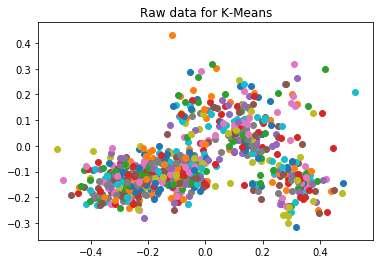

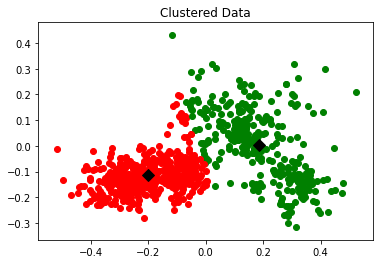

In [7]:
main()